<a href="https://colab.research.google.com/github/BaltiAhmed/TradingBot-LSTM/blob/main/LSTM_Scalping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- Import des librairies ---
!pip install pandas numpy matplotlib seaborn plotly tensorflow python-binance backtrader


# Étape 1 – Chargement des données

In [2]:
# Imports de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [6]:

import pandas as pd

# --- Charger ton fichier CSV (upload depuis ton PC vers Colab) ---
from google.colab import files
uploaded = files.upload()   # choisis "klines_BTCUSDT_1m_mainnet_last365days.csv"

# --- Lire le fichier CSV ---
df = pd.read_csv("klines_BTCUSDT_1m_mainnet_last365days.csv")

# --- Conversion de la date ---
df['open_time_utc'] = pd.to_datetime(df['open_time_utc'])

# --- Sélection des colonnes essentielles ---
df = df[['open_time_utc', 'open', 'high', 'low', 'close', 'volume']]

# --- Mettre l’horodatage comme index ---
df.set_index('open_time_utc', inplace=True)

# --- Conversion en float ---
df = df.astype(float)

# --- Aperçu ---
print("Shape:", df.shape)
print(df.head())
print(df.info())


Saving klines_BTCUSDT_1m_mainnet_last365days.csv to klines_BTCUSDT_1m_mainnet_last365days (1).csv
Shape: (525600, 5)
                               open      high       low     close    volume
open_time_utc                                                              
2024-10-13 16:11:00+00:00  62279.25  62279.26  62272.54  62278.65   3.11370
2024-10-13 16:12:00+00:00  62278.64  62278.65  62278.62  62278.62   0.90092
2024-10-13 16:13:00+00:00  62278.63  62278.63  62278.62  62278.62   3.46890
2024-10-13 16:14:00+00:00  62278.62  62278.63  62274.64  62278.00   3.01594
2024-10-13 16:15:00+00:00  62278.00  62324.50  62278.00  62324.49  12.46947
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2024-10-13 16:11:00+00:00 to 2025-10-13 16:10:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   open    525600 non-null  float64
 1   high    525600 non-null  float64
 2   low     525600 non-null  float64
 3   

# Étape 2 – Exploration & Indicateurs techniques

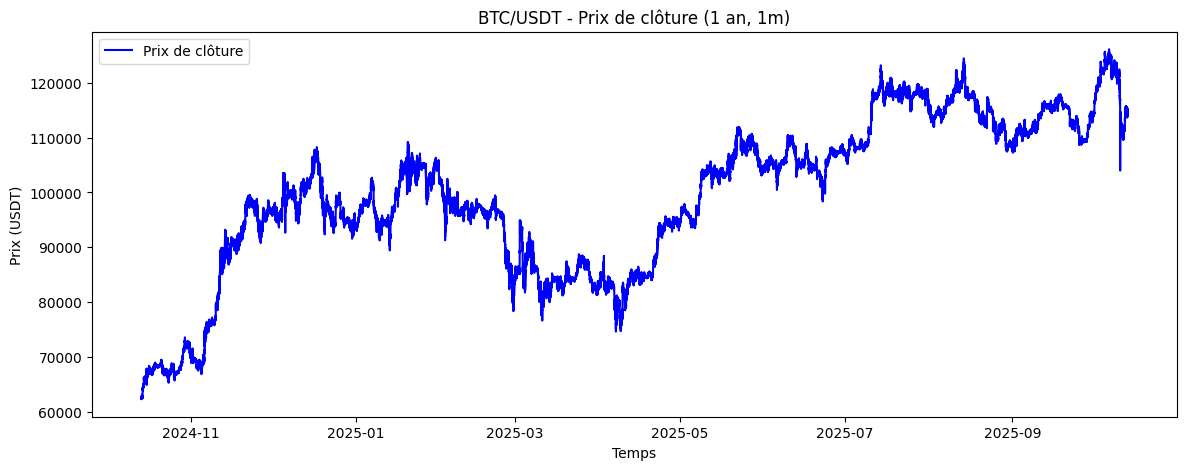

In [7]:
import matplotlib.pyplot as plt

# --- Tracer le prix de clôture sur 1 an ---
plt.figure(figsize=(14,5))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue")
plt.title("BTC/USDT - Prix de clôture (1 an, 1m)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()


In [8]:
import numpy as np
import pandas as pd

# SMA (Simple Moving Average)
df["SMA_20"] = df["close"].rolling(window=20).mean()

# EMA (Exponential Moving Average)
df["EMA_20"] = df["close"].ewm(span=20, adjust=False).mean()

# RSI (Relative Strength Index, 14 périodes)
delta = df["close"].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)
avg_gain = pd.Series(gain).rolling(window=14).mean()
avg_loss = pd.Series(loss).rolling(window=14).mean()
rs = avg_gain / avg_loss
df["RSI_14"] = 100 - (100 / (1 + rs))

# Bandes de Bollinger (20 périodes)
df["BB_middle"] = df["close"].rolling(window=20).mean()
df["BB_std"] = df["close"].rolling(window=20).std()
df["BB_upper"] = df["BB_middle"] + 2*df["BB_std"]
df["BB_lower"] = df["BB_middle"] - 2*df["BB_std"]

# Vérification
print(df.tail(5))


                                open       high        low      close  \
open_time_utc                                                           
2025-10-13 16:06:00+00:00  114594.53  114694.91  114575.68  114635.76   
2025-10-13 16:07:00+00:00  114635.77  114721.15  114634.09  114708.21   
2025-10-13 16:08:00+00:00  114708.21  114974.01  114691.00  114903.41   
2025-10-13 16:09:00+00:00  114903.41  115034.71  114903.40  114956.07   
2025-10-13 16:10:00+00:00  114956.07  115034.69  114954.79  114985.55   

                             volume       SMA_20         EMA_20  RSI_14  \
open_time_utc                                                             
2025-10-13 16:06:00+00:00  28.23227  114448.1730  114446.182652     NaN   
2025-10-13 16:07:00+00:00  27.27103  114462.8255  114471.137637     NaN   
2025-10-13 16:08:00+00:00  38.14020  114489.4310  114512.306434     NaN   
2025-10-13 16:09:00+00:00  31.08170  114510.6745  114554.569631     NaN   
2025-10-13 16:10:00+00:00  12.98936  1

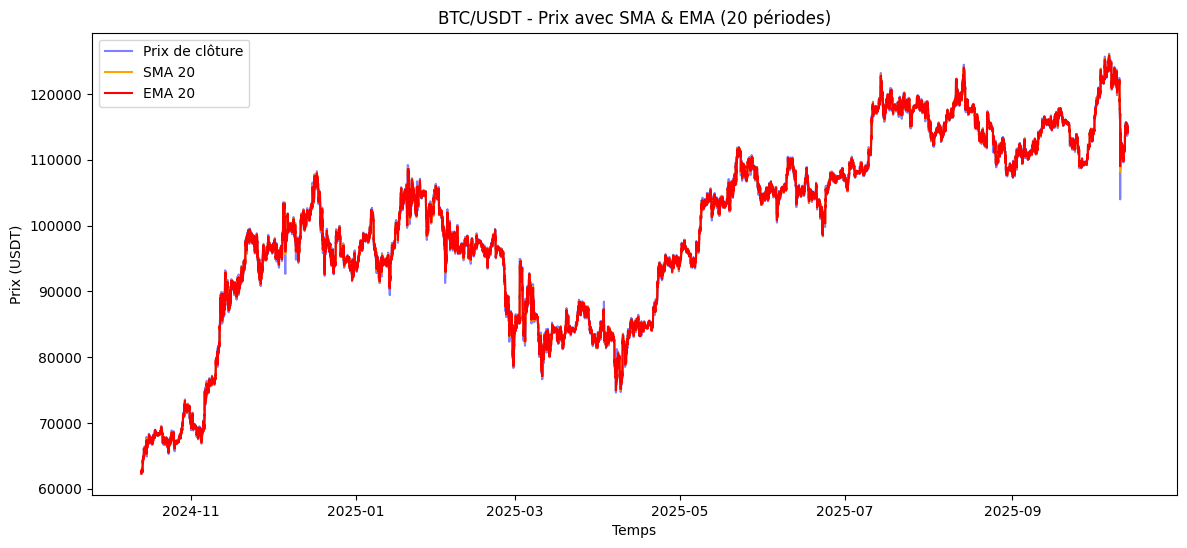

In [9]:
# --- Visualisation SMA & EMA sur les prix ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['SMA_20'], label="SMA 20", color="orange")
plt.plot(df.index, df['EMA_20'], label="EMA 20", color="red")
plt.title("BTC/USDT - Prix avec SMA & EMA (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [10]:
!pip install ta


                               close     RSI_14
open_time_utc                                  
2025-10-13 15:51:00+00:00  114578.58  62.005459
2025-10-13 15:52:00+00:00  114458.36  54.700395
2025-10-13 15:53:00+00:00  114380.50  50.546924
2025-10-13 15:54:00+00:00  114359.89  49.475988
2025-10-13 15:55:00+00:00  114332.43  48.016285
2025-10-13 15:56:00+00:00  114336.25  48.245039
2025-10-13 15:57:00+00:00  114407.67  52.457407
2025-10-13 15:58:00+00:00  114383.99  50.975960
2025-10-13 15:59:00+00:00  114312.10  46.667106
2025-10-13 16:00:00+00:00  114282.32  44.971313
2025-10-13 16:01:00+00:00  114424.66  53.642338
2025-10-13 16:02:00+00:00  114421.42  53.435934
2025-10-13 16:03:00+00:00  114519.38  58.620192
2025-10-13 16:04:00+00:00  114602.67  62.448379
2025-10-13 16:05:00+00:00  114594.53  61.846189
2025-10-13 16:06:00+00:00  114635.76  63.752794
2025-10-13 16:07:00+00:00  114708.21  66.884388
2025-10-13 16:08:00+00:00  114903.41  73.521882
2025-10-13 16:09:00+00:00  114956.07  74

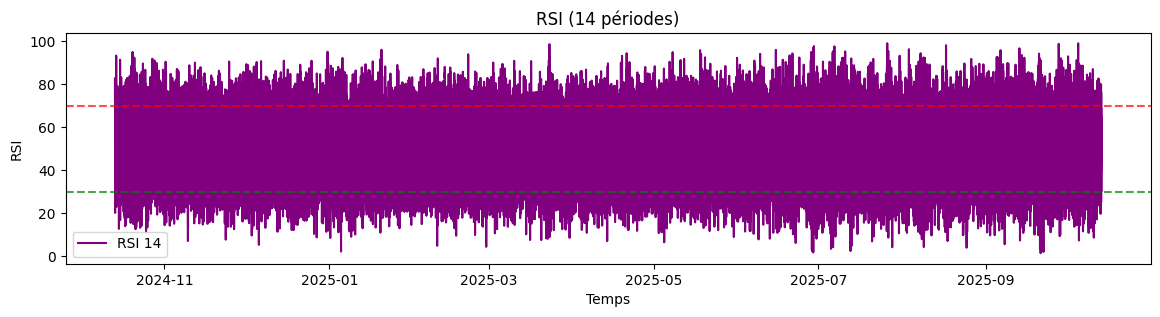

In [11]:
import ta

# RSI avec la librairie ta
df["RSI_14"] = ta.momentum.RSIIndicator(df["close"], window=14).rsi()

# Vérification rapide
print(df[["close", "RSI_14"]].tail(20))

# Nouveau tracé
plt.figure(figsize=(14,3))
plt.plot(df.index, df['RSI_14'], label="RSI 14", color="purple")
plt.axhline(70, linestyle="--", color="red", alpha=0.7)   # Surachat
plt.axhline(30, linestyle="--", color="green", alpha=0.7) # Survente
plt.title("RSI (14 périodes)")
plt.xlabel("Temps")
plt.ylabel("RSI")
plt.legend()
plt.show()


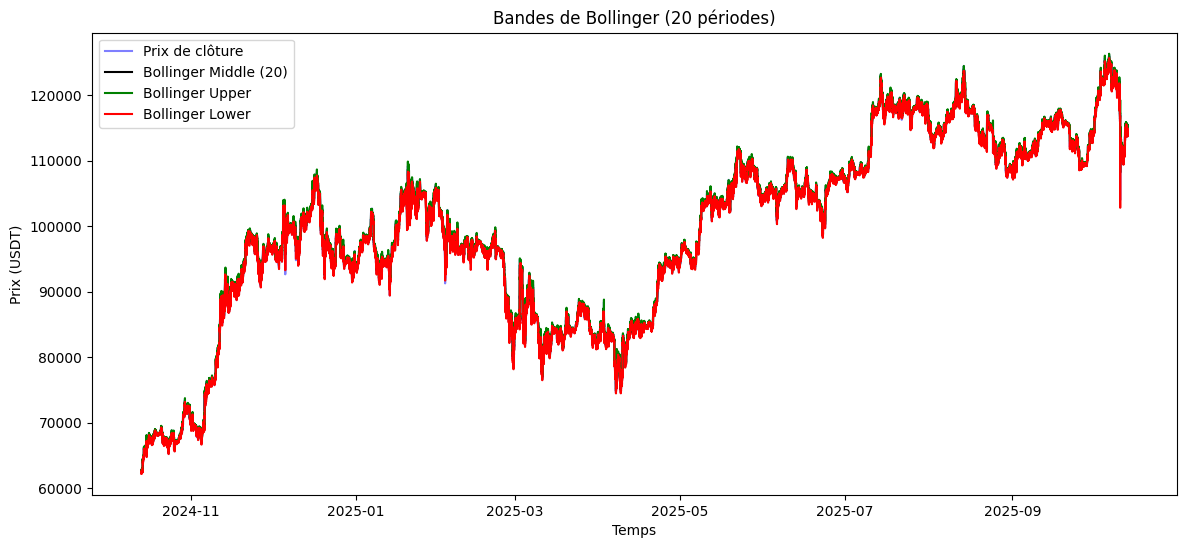

In [12]:
# --- Visualisation Bandes de Bollinger ---
plt.figure(figsize=(14,6))
plt.plot(df.index, df['close'], label="Prix de clôture", color="blue", alpha=0.5)
plt.plot(df.index, df['BB_middle'], label="Bollinger Middle (20)", color="black")
plt.plot(df.index, df['BB_upper'], label="Bollinger Upper", color="green")
plt.plot(df.index, df['BB_lower'], label="Bollinger Lower", color="red")
plt.fill_between(df.index, df['BB_lower'], df['BB_upper'], color="gray", alpha=0.1)
plt.title("Bandes de Bollinger (20 périodes)")
plt.xlabel("Temps")
plt.ylabel("Prix (USDT)")
plt.legend()
plt.show()

In [13]:
import ta

# === Ajout des indicateurs directionnels ===
macd = ta.trend.MACD(df['close'])
df['macd'] = macd.macd()
df['macd_signal'] = macd.macd_signal()
df['macd_hist'] = macd.macd_diff()

adx = ta.trend.ADXIndicator(df['high'], df['low'], df['close'], window=14)
df['adx'] = adx.adx()

sto = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3)
df['sto_k'] = sto.stoch()
df['sto_d'] = sto.stoch_signal()

atr = ta.volatility.AverageTrueRange(df['high'], df['low'], df['close'], window=14)
df['atr_14'] = atr.average_true_range()

# Nettoyage
df.fillna(method='bfill', inplace=True)
df.fillna(0, inplace=True)


/tmp/ipython-input-2071153610.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # 🆕 Sauvegarde en CSV (version enrichie)
# df.to_csv("/content/drive/MyDrive/BTC_1m_preprocessed_v2.csv", index=False)

# # 🆕 Sauvegarde en Pickle (plus rapide à recharger)
# df.to_pickle("/content/drive/MyDrive/BTC_1m_preprocessed_v2.pkl")

# print("✅ Nouveau dataset enrichi sauvegardé sous : BTC_1m_preprocessed_v2.csv et .pkl")

In [ ]:
# import pandas as pd
# df = pd.read_pickle("/content/drive/MyDrive/BTC_1m_preprocessed_v2.pkl")
# print(df.shape)
# df.head()


# Étape 3 – Prétraitement

In [14]:
# Création des df_features,on garde uniquement les colonnes utiles pour l'entraînement
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]
df_features = df[features].dropna().copy()  # dropna car indicateurs techniques au début sont NaN

print("Shape après sélection :", df_features.shape)
df_features.head()


Shape après sélection : (525600, 18)


,open,high,low,close,volume,EMA_20,RSI_14,BB_middle,BB_std,BB_upper,BB_lower,macd,macd_signal,macd_hist,adx,sto_k,sto_d,atr_14
open_time_utc,,,,,,,,,,,,,,,,,,
2024-10-13 16:11:00+00:00,62279.25,62279.26,62272.54,62278.65,3.11370,62278.650000,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:12:00+00:00,62278.64,62278.65,62278.62,62278.62,0.90092,62278.647143,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:13:00+00:00,62278.63,62278.63,62278.62,62278.62,3.46890,62278.644558,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:14:00+00:00,62278.62,62278.63,62274.64,62278.00,3.01594,62278.583171,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0
2024-10-13 16:15:00+00:00,62278.00,62324.50,62278.00,62324.49,12.46947,62282.955250,74.21855,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.0


In [15]:
#Labeling : définir la logique de Buy/Sell/Hold

horizon = 3  # nombre de minutes à prévoir
threshold = 0.001  # 0.1% mouvement

# On garde uniquement les colonnes utiles pour l'entraînement
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]
df_features = df[features].dropna().copy()  # dropna car indicateurs techniques au début sont NaN


df_features["future_close"] = df["close"].shift(-horizon)

df_features["label"] = 0
df_features.loc[(df_features["future_close"] - df_features["close"]) / df_features["close"] > threshold, "label"] = 1
df_features.loc[(df_features["future_close"] - df_features["close"]) / df_features["close"] < -threshold, "label"] = -1

# Remap labels -1, 0, 1 to 0, 1, 2 for sparse_categorical_crossentropy
label_mapping = {-1: 0, 0: 1, 1: 2}
df_features["label"] = df_features["label"].map(label_mapping)


# Supprimer les dernières lignes qui n'ont pas de future_close
df_features = df_features.dropna()

print(df_features["label"].value_counts())
df_features.head(15)

label
1    410175
2     58388
0     57034
Name: count, dtype: int64


,open,high,low,close,volume,EMA_20,RSI_14,BB_middle,BB_std,BB_upper,BB_lower,macd,macd_signal,macd_hist,adx,sto_k,sto_d,atr_14,future_close,label
open_time_utc,,,,,,,,,,,,,,,,,,,,
2024-10-13 16:11:00+00:00,62279.25,62279.26,62272.54,62278.65,3.11370,62278.650000,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62278.00,1
2024-10-13 16:12:00+00:00,62278.64,62278.65,62278.62,62278.62,0.90092,62278.647143,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62324.49,1
2024-10-13 16:13:00+00:00,62278.63,62278.63,62278.62,62278.62,3.46890,62278.644558,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62312.42,1
2024-10-13 16:14:00+00:00,62278.62,62278.63,62274.64,62278.00,3.01594,62278.583171,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62355.01,2
2024-10-13 16:15:00+00:00,62278.00,62324.50,62278.00,62324.49,12.46947,62282.955250,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62430.04,2
2024-10-13 16:16:00+00:00,62324.50,62324.50,62306.00,62312.42,6.48612,62285.761417,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62450.26,2
2024-10-13 16:17:00+00:00,62312.42,62356.00,62312.42,62355.01,9.51800,62292.356520,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62411.50,1
2024-10-13 16:18:00+00:00,62355.01,62430.04,62355.00,62430.04,27.52005,62305.469232,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62450.00,1
2024-10-13 16:19:00+00:00,62430.04,62476.22,62426.00,62450.26,34.99775,62319.258829,74.218550,62402.2955,80.634024,62563.563548,62241.027452,72.68294,72.402934,-4.564578,0.0,76.553307,78.503105,0.000000,62475.56,1


In [16]:
# transformer les données en séquences pour LSTM.
import numpy as np

# Paramètres
seq_len = 20  # taille de la fenêtre temporelle
features = [
    'open', 'high', 'low', 'close', 'volume',
    'EMA_20', 'RSI_14', 'BB_middle', 'BB_std', 'BB_upper', 'BB_lower',
    'macd', 'macd_signal', 'macd_hist', 'adx', 'sto_k', 'sto_d', 'atr_14'
]
# On convertit en numpy pour accélérer
data = df_features[features].values
labels = df_features["label"].values

X, y = [], []

for i in range(len(data) - seq_len):
    X.append(data[i:i+seq_len])   # séquence de 20 bougies
    y.append(labels[i+seq_len])   # label associé à la fin de la séquence

X = np.array(X)
y = np.array(y)

print("Shape X :", X.shape)  # (nb_samples, 20, nb_features)
print("Shape y :", y.shape)  # (nb_samples,)


Shape X : (525577, 20, 18)
Shape y : (525577,)


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Etape 4 : préparation du dataset pour LSTM.

In [18]:
from sklearn.preprocessing import StandardScaler

# Découpagedes données train/test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False  # respect de la chronologie
)

print("Shapes après split :")
print("X_train :", X_train.shape, "y_train :", y_train.shape)
print("X_test :", X_test.shape, "y_test :", y_test.shape)

print("\nRépartition des classes (avant oversampling) :")
print("Train :", np.bincount(y_train))
print("Test  :", np.bincount(y_test))


Shapes après split :
X_train : (420461, 20, 18) y_train : (420461,)
X_test : (105116, 20, 18) y_test : (105116,)

Répartition des classes (avant oversampling) :
Train : [ 50401 318481  51579]
Test  : [ 6633 91681  6802]


In [19]:

# --- transformations de base ---
def jitter(seq, sigma=0.001):
    """Multiplicative gaussian jitter : seq * (1 + N(0,sigma))"""
    noise = np.random.normal(loc=0.0, scale=sigma, size=seq.shape)
    return seq * (1.0 + noise)

def scaling_seq(seq, scale_sigma=0.002):
    """Small multiplicative scaling factor"""
    factor = np.random.normal(loc=1.0, scale=scale_sigma)
    return seq * factor

def time_roll(seq, max_shift=2):
    """Conservative time-warp by small rolling (pad with edge values)"""
    s = seq.copy()
    shift = np.random.randint(-max_shift, max_shift+1)
    if shift == 0:
        return s
    if shift > 0:
        pad = np.repeat(s[0:1, :], shift, axis=0)
        return np.vstack([pad, s[:-shift, :]])
    else:
        pad = np.repeat(s[-1:, :], -shift, axis=0)
        return np.vstack([s[-shift:, :], pad])

def augment_sequence(seq, methods=("jitter","scaling"), jitter_sigma=0.001, scaling_sigma=0.002):
    x = seq.copy()
    for m in methods:
        if m == "jitter":
            x = jitter(x, sigma=jitter_sigma)
        elif m == "scaling":
            x = scaling_seq(x, scale_sigma=scaling_sigma)
        elif m == "roll":
            x = time_roll(x, max_shift=1)
    return x


In [20]:

# Paramètres d'augmentation — ajuste si besoin
target_ratio = 0.5   # produire au plus target_ratio * majority_count par classe minoritaire (0.5 = moitié de la majorité)
methods = ("jitter","scaling")  # méthodes à combiner
jitter_sigma = 0.002
scaling_sigma = 0.002
random_state = 42
np.random.seed(random_state)

# Comptes actuels
unique, counts = np.unique(y_train, return_counts=True)
counts_dict = dict(zip(unique, counts))
majority = max(counts)
print("Distribution train avant augmentation:", counts_dict, "majority =", majority)

# On génère jusqu'à desired_count = int(target_ratio * majority)
desired = int(target_ratio * majority)

X_aug_list = [X_train]   # contiendra blocs à concat
y_aug_list = [y_train]

for cls in sorted(unique):
    if cls == 1:  # skip Hold (classe majoritaire)
        continue
    idxs = np.where(y_train == cls)[0]
    n_current = len(idxs)
    if n_current >= desired:
        print(f"Classe {cls} déjà >= desired ({n_current} >= {desired}), pas d'augmentation.")
        continue

    needed = desired - n_current
    print(f"Augmenter classe {cls} : {n_current} → {desired} (ajout de {needed} seq)")

    for _ in range(needed):
        pick = np.random.choice(idxs)
        seq = X_train[pick]
        # appliquer une transformation aléatoire
        new_seq = augment_sequence(seq, methods=methods, jitter_sigma=jitter_sigma, scaling_sigma=scaling_sigma)
        X_aug_list.append(new_seq[np.newaxis, ...])
        y_aug_list.append(np.array([cls]))

# concatner tout
X_train_aug = np.vstack([np.atleast_2d(x) for x in X_aug_list])
y_train_aug = np.hstack(y_aug_list)

# shuffle
perm = np.random.RandomState(random_state).permutation(len(y_train_aug))
X_train_aug = X_train_aug[perm]
y_train_aug = y_train_aug[perm]

unique2, counts2 = np.unique(y_train_aug, return_counts=True)
print("Distribution train après augmentation :", dict(zip(unique2, counts2)))


Distribution train avant augmentation: {np.int64(0): np.int64(50401), np.int64(1): np.int64(318481), np.int64(2): np.int64(51579)} majority = 318481
Augmenter classe 0 : 50401 → 159240 (ajout de 108839 seq)
Augmenter classe 2 : 51579 → 159240 (ajout de 107661 seq)
Distribution train après augmentation : {np.int64(0): np.int64(159240), np.int64(1): np.int64(318481), np.int64(2): np.int64(159240)}


In [21]:
# ⚠️ Normalisation : on scale seulement sur le TRAIN pour éviter data leakage(toutes les colonnes doivent être sur la même échelle)
from sklearn.preprocessing import StandardScaler
scalers = []
X_train_scaled = np.zeros_like(X_train_aug)
X_test_scaled = np.zeros_like(X_test)

for i in range(X_train_aug.shape[2]):  # pour chaque feature
    scaler = StandardScaler()
    # on doit aplatir la dimension temps pour fit_transform per-feature across samples & timesteps
    # mais comme on faisait avant feature-wise sur la 2D (samples, timesteps)
    X_train_scaled[:, :, i] = scaler.fit_transform(X_train_aug[:, :, i])
    # transformer test (attention : test n'a pas été augmenté)
    X_test_scaled[:, :, i] = scaler.transform(X_test[:, :, i])
    scalers.append(scaler)

print("✅ Normalisation sur données augmentées terminée")
print("X_train_scaled shape:", X_train_scaled.shape)


✅ Normalisation sur données augmentées terminée
X_train_scaled shape: (636961, 20, 18)


In [ ]:
import numpy as np
from sklearn.utils import resample

X_train_balanced, y_train_balanced = [], []

# On utilise maintenant les données déjà augmentées et normalisées
max_class = np.max(np.bincount(y_train_aug))
target_samples = int(0.8 * max_class)  # ajuste le ratio selon le niveau d'équilibrage voulu

for label in np.unique(y_train_aug):
    X_class = X_train_scaled[y_train_aug == label]
    y_class = y_train_aug[y_train_aug == label]

    # Oversampling (optionnel mais léger, pour uniformiser encore plus)
    if len(X_class) < target_samples:
        X_res, y_res = resample(
            X_class, y_class,
            replace=True,
            n_samples=target_samples,
            random_state=42
        )
    else:
        # Si déjà suffisant, on garde tel quel
        X_res, y_res = X_class, y_class

    X_train_balanced.append(X_res)
    y_train_balanced.append(y_res)

# Fusion
X_train_balanced = np.vstack(X_train_balanced)
y_train_balanced = np.hstack(y_train_balanced)

print("\n✅ Nouvelle distribution après augmentation + léger oversampling :")
print(np.bincount(y_train_balanced))


In [ ]:
# ⚖️ Calcul des class weights après augmentation et équilibrage
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

print("Existence des variables :")
print(" - X_train_balanced :", "X_train_balanced" in globals())
print(" - y_train_balanced :", "y_train_balanced" in globals())
print(" - X_test_scaled :", "X_test_scaled" in globals())
print(" - y_test :", "y_test" in globals())

# Conversion en int (sécurité)
y_train_balanced = np.array(y_train_balanced).astype(int)

# 🔄 Utiliser y_train_balanced (et non y_train ou y_train_aug)
classes = np.unique(y_train_balanced)

# Calcul automatique des poids inverses de fréquence
class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train_balanced
)

# Conversion en dictionnaire pour Keras
class_weights = {int(c): float(w) for c, w in zip(classes, class_weights_values)}

print("\n✅ Class weights recalculés sur le dataset final (après augmentation + oversampling) :")
print(class_weights)


# Étape 5: Construction du modèle Bidirectional LSTM

In [ ]:
from tensorflow.keras import backend as K
import tensorflow as tf

def focal_loss(gamma=2., alpha=1.):
    def focal_loss_fixed(y_true, y_pred):
        # S'assure que y_true est en int32 et a la bonne forme
        y_true = tf.reshape(tf.cast(y_true, tf.int32), [-1])
        y_true_onehot = tf.one_hot(y_true, depth=tf.shape(y_pred)[-1])

        # Clip pour stabilité numérique
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())

        # Calcul de la focal loss
        cross_entropy = -y_true_onehot * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = K.sum(weight * cross_entropy, axis=1)

        return K.mean(loss)
    return focal_loss_fixed


In [ ]:
print("Shape de X_train_balanced :", X_train_balanced.shape)


In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras import backend as K


In [ ]:
from tensorflow.keras import metrics
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

# Modèle LSTM
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, input_shape=(X_train_balanced.shape[1], X_train_balanced.shape[2]))),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss=focal_loss(gamma=1.5, alpha=0.75),
    metrics=[metrics.SparseCategoricalAccuracy(name="accuracy")]
)

model.build(input_shape=(None, X_train_balanced.shape[1], X_train_balanced.shape[2]))
model.summary()

In [ ]:
#Calcul des class weights
#class_weights_values = compute_class_weight(
   # class_weight='balanced',
   # classes=np.unique(y_train_balanced),
   # y=y_train_balanced
#)
##class_weights = dict(enumerate(class_weights_values))

#print(" Class weights calculés :", class_weights)


In [ ]:
print("y_train_balanced shape:", y_train_balanced.shape)
print("y_test shape:", y_test.shape)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=7,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights,
)

In [ ]:
list(globals().keys())

# Étape 6: Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Évaluation sur le test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1)

print("📊 Rapport de classification :")
print(classification_report(y_test, y_pred_classes, target_names=["Sell", "Hold", "Buy"]))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Sell","Hold","Buy"],
            yticklabels=["Sell","Hold","Buy"])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion")
plt.show()


#Étape 7: Filtrage de confiance (post-prédiction) & sauvegarde du modèle

In [ ]:
probas = model.predict(X_test_scaled)
max_conf = probas.max(axis=1)
pred_class = probas.argmax(axis=1)

for thr in [0.6, 0.7, 0.75, 0.8]:
    filtered_pred = np.where(max_conf >= thr, pred_class, 1)
    print("thr", thr)
    print(classification_report(y_test, filtered_pred, target_names=["Sell","Hold","Buy"]))


In [ ]:
# Sauvegarde du modèle
model.save("/content/drive/MyDrive/models/LSTM_trading_vFinal.keras")

# Sauvegarde du scaler (pour les futures données)
import joblib
joblib.dump(scalers, "/content/drive/MyDrive/models/scalers_vFinal.pkl")

print("✅ Modèle et scalers sauvegardés avec succès !")


# Étape 8 — Réutilisation sur de nouvelles données




Importation et chargement du modèle + scalers

In [ ]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from binance.client import Client
import ta  # pour les indicateurs techniques

# Charger ton modèle et les scalers
model = load_model("/content/drive/MyDrive/models/LSTM_trading_vFinal.keras",
                   custom_objects={"focal_loss": focal_loss})
scalers = joblib.load("/content/drive/MyDrive/models/scalers_vFinal.pkl")

# Connexion à l’API Binance
api_key = "YOUR_BINANCE_API_KEY"
api_secret = "YOUR_BINANCE_API_SECRET"
client = Client(api_key, api_secret)

Fonction pour récupérer les données récentes de Binance

In [ ]:
def get_latest_data(symbol="BTCUSDT", interval="1m", lookback=200):
    klines = client.get_klines(symbol=symbol, interval=interval, limit=lookback)
    df = pd.DataFrame(klines, columns=[
        "timestamp", "open", "high", "low", "close", "volume", "_1", "_2", "_3", "_4", "_5", "_6"
    ])
    df = df[["timestamp", "open", "high", "low", "close", "volume"]]
    df = df.astype(float)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    return df


Fonction de prétraitement automatique (identique à l'entraînement)

In [ ]:
def preprocess_live_data(df, seq_len=60):
    # Calcul des indicateurs techniques
    df["EMA_20"] = ta.trend.ema_indicator(df["close"], window=20)
    df["RSI_14"] = ta.momentum.rsi(df["close"], window=14)
    bb = ta.volatility.BollingerBands(df["close"], window=20, window_dev=2)
    df["BB_middle"] = bb.bollinger_mavg()
    df["BB_std"] = bb.bollinger_mavg()
    df["BB_upper"] = bb.bollinger_hband()
    df["BB_lower"] = bb.bollinger_lband()

    df = df.dropna()

    # Créer la dernière séquence compatible avec le modèle
    features = df[["open","high","low","close","volume",
                   "EMA_20","RSI_14","BB_middle","BB_upper","BB_lower"]].values
    X_seq = features[-seq_len:].reshape(1, seq_len, features.shape[1])

    # Scaling (même scalers utilisés à l’entraînement)
    X_seq_scaled = np.zeros_like(X_seq)
    for i, scaler in enumerate(scalers):
        X_seq_scaled[:,:,i] = scaler.transform(X_seq[:,:,i])

    return X_seq_scaled


Fonction de prédiction automatique

In [ ]:
def predict_signal(symbol="BTCUSDT"):
    df = get_latest_data(symbol)
    X_live = preprocess_live_data(df)

    probas = model.predict(X_live)
    conf = probas.max(axis=1)[0]
    pred_class = probas.argmax(axis=1)[0]

    mapping = {0:"Sell", 1:"Hold", 2:"Buy"}
    decision = mapping[pred_class]

    if conf < 0.7:
        decision = "Hold (low confidence)"

    print(f"🪙 {symbol} → {decision} (Confiance: {conf:.2f})")
    return decision, conf


Exécution de test

In [ ]:
predict_signal("BTCUSDT")
